## Compare perfect information vs no perfect information

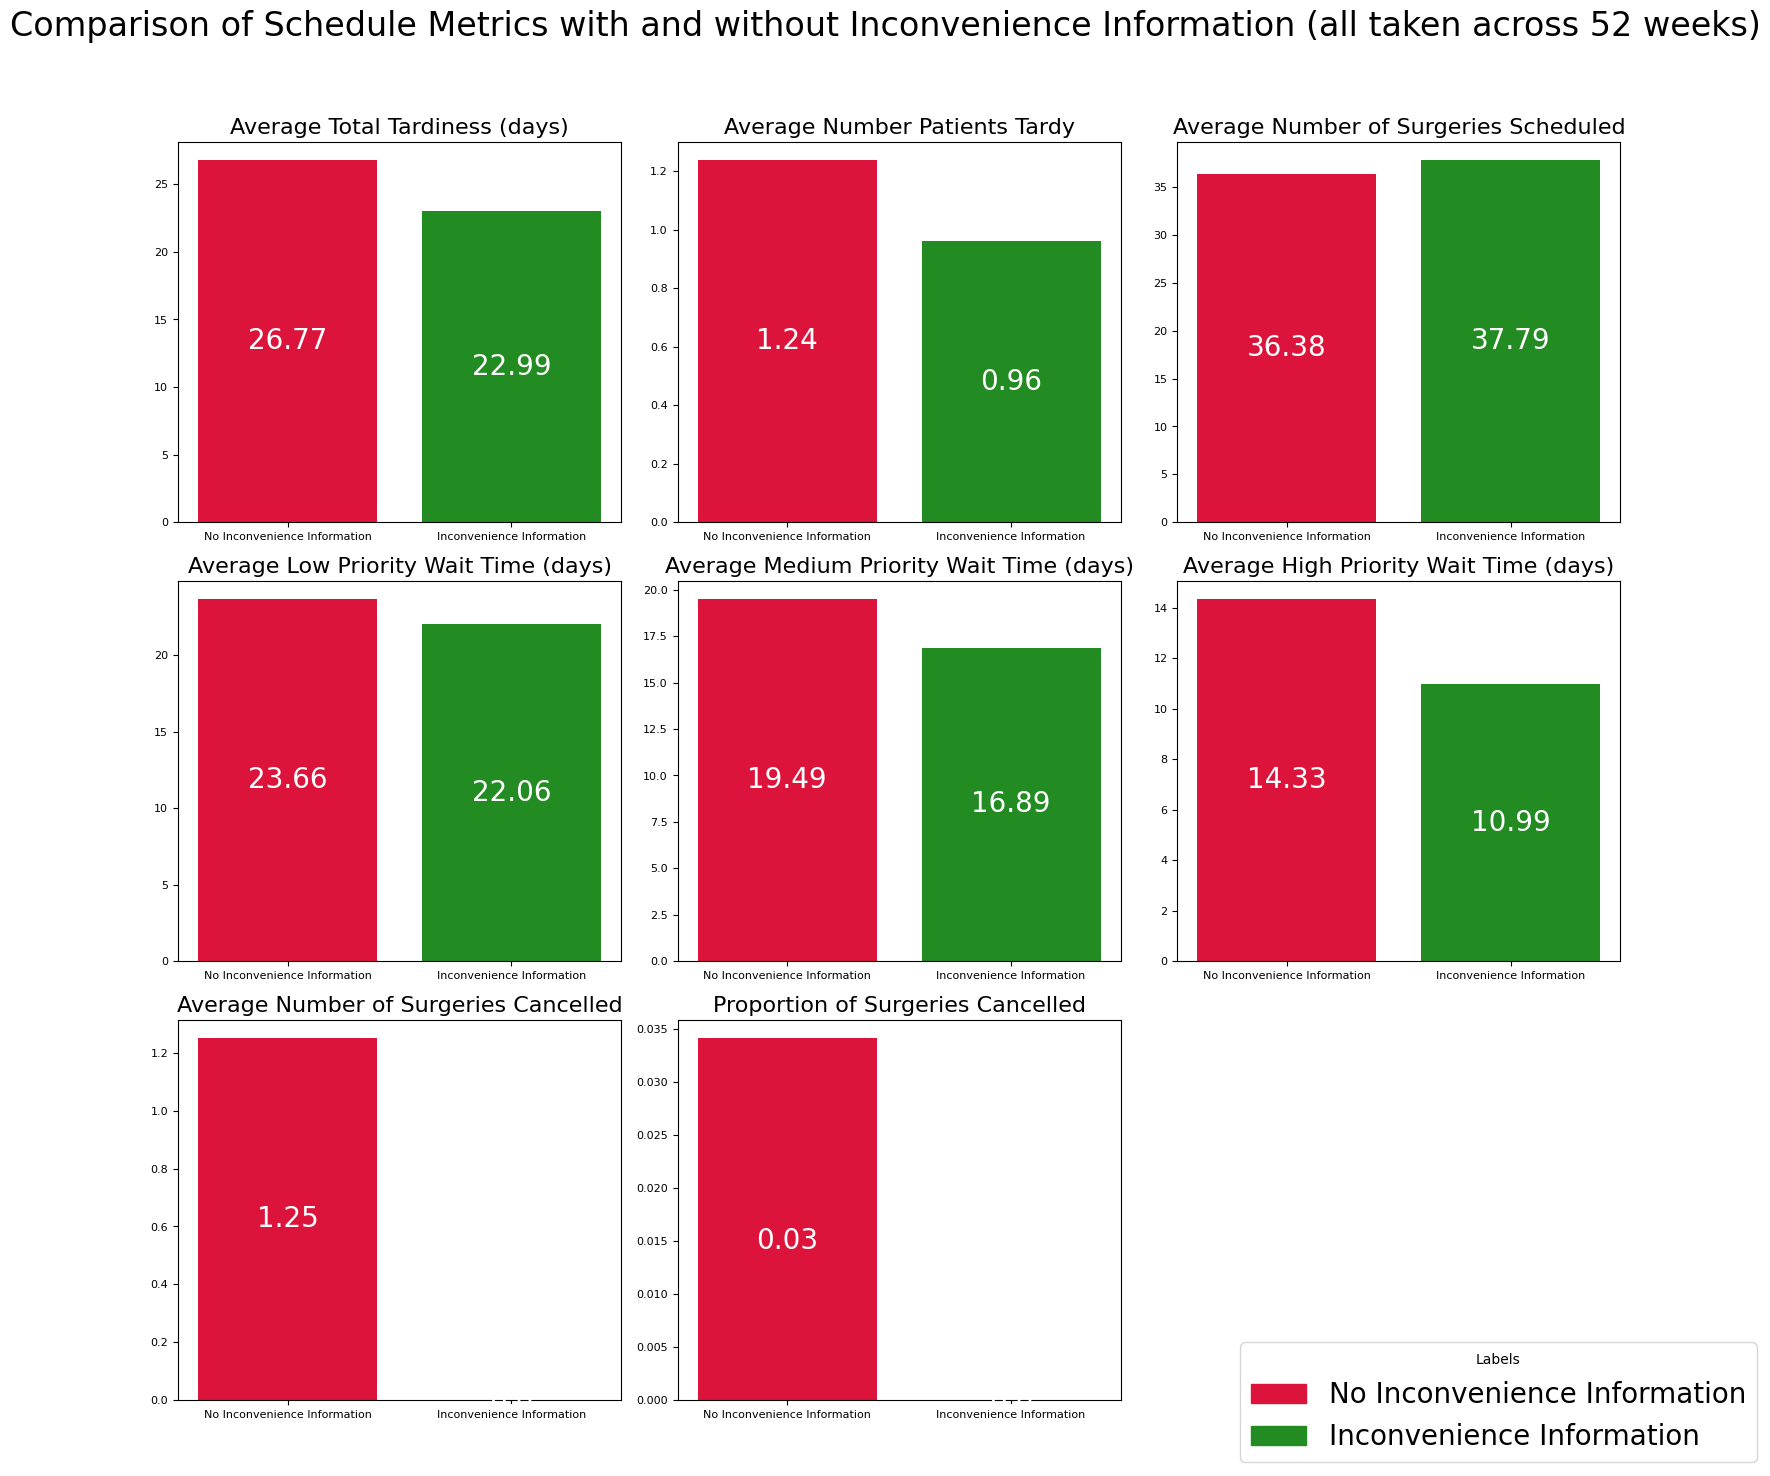

In [8]:
import matplotlib.pyplot as plt
import numpy as np

import math

import pandas as pd
from pathlib import Path
import os

from matplotlib.patches import Patch

plt.style.use('presentation.mplstyle')

# Brodie's path path 
repo_path = Path("C:/Users/Grant Dye/Documents/Uni/Engsci/4th year/part4project/surgery_scheduling/brodie_perrie_code")
OUTPUT_DIR = os.path.abspath(os.path.join(repo_path,'output/databases'))

# Check if the path is correct
csv_path = os.path.join(OUTPUT_DIR, "average_values_specialty_0_disruptionTrue_5_runs.csv")
avg_values = pd.read_csv(csv_path)

# Labels for the bars
labels = ['No Inconvenience Information', 'Inconvenience Information']

categories = [
    'total tardiness', 'number of patients tardy', 'number of surgeries scheduled', 
    'average wait time (priority < 0.33)', 'average wait_time (0.33 < priority < 0.66)', 'average wait time 0.66 < priority',
    'num surgeries cancelled', 'cancelation proportion'
]

title_map = {
    'average wait time (priority < 0.33)': 'Average Low Priority Wait Time (days)', 
    'average wait_time (0.33 < priority < 0.66)': 'Average Medium Priority Wait Time (days)', 
    'average wait time 0.66 < priority': 'Average High Priority Wait Time (days)', 
    'total tardiness': 'Average Total Tardiness (days)', 
    'number of patients tardy': 'Average Number Patients Tardy', 
    'number of surgeries scheduled': 'Average Number of Surgeries Scheduled', 
    'num surgeries cancelled': 'Average Number of Surgeries Cancelled',
    'cancelation proportion': 'Proportion of Surgeries Cancelled'
}

# Define colors for each label
color_map = {
    'Inconvenience Information': '#228B22',
    'No Inconvenience Information': '#DC143C',
}

# Get colors for each label
colors = [color_map[label] for label in labels]

# Create a 3x3 subplot
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each bar graph
for i in range(8):
    bars = axes[i].bar(labels, avg_values[categories[i]].values, color=colors)
    axes[i].set_title(title_map[categories[i]], fontsize=16)
    # Add labels
    for bar in bars:
        yval = round(bar.get_height(), 2)
        axes[i].text(bar.get_x() + bar.get_width() / 2, yval / 2, f'{yval}', ha='center', va='center', color='white', fontsize=20)

# Hide the last two empty subplots
for j in range(8, 9):
    fig.delaxes(axes[j])

# Create custom legend handles
handles = [Patch(color=color_map[label], label=label) for label in labels]

# Add the legend to the figure
fig.legend(handles=handles, loc='lower right', title='Labels', prop={'size': 20})
fig.suptitle("Comparison of Schedule Metrics with and without Inconvenience Information (all taken across 52 weeks)", fontsize=24)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()



## Compare Disruption Constraint vs no disruption constraint

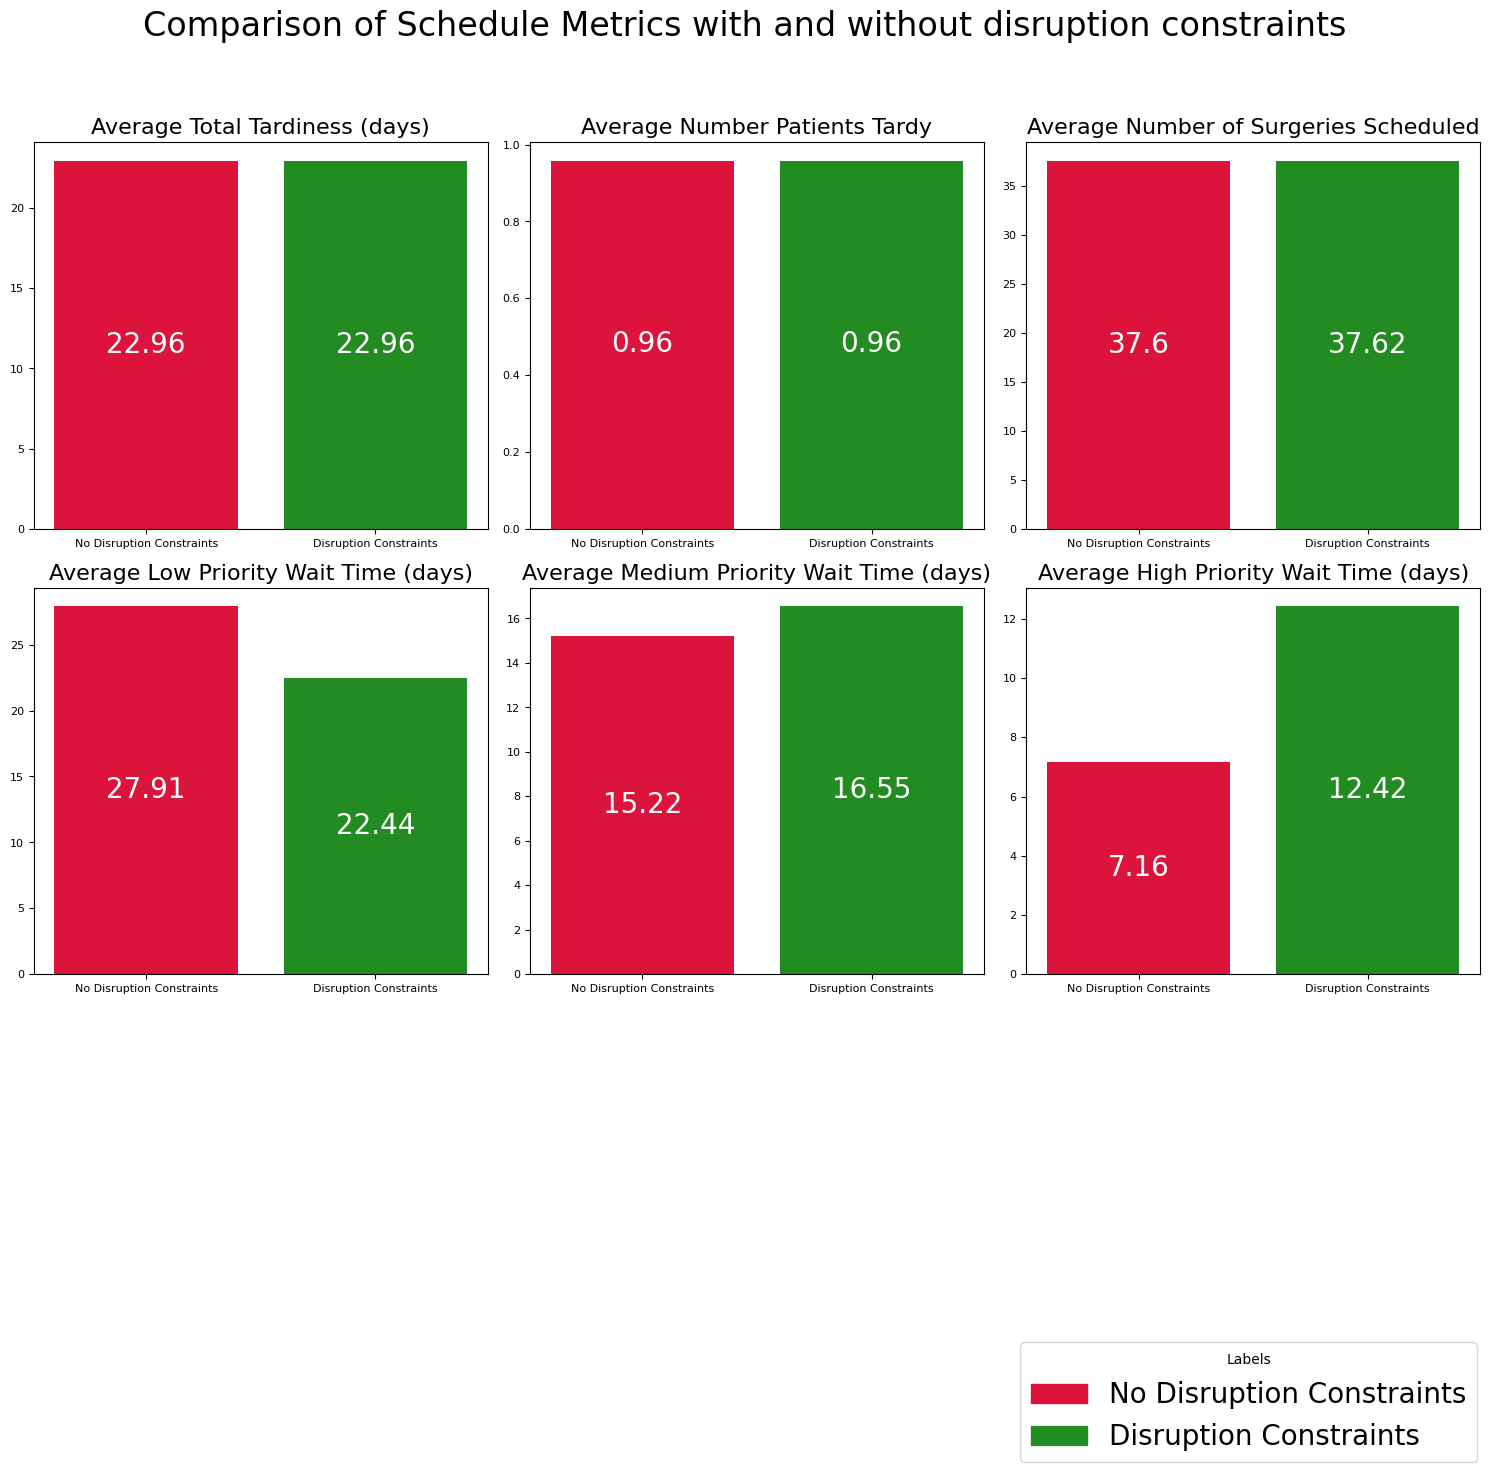

In [10]:
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
from pathlib import Path
import os

from matplotlib.patches import Patch

import sys

plt.style.use('presentation.mplstyle')

# Brodie's path path 
repo_path = Path("C:/Users/Grant Dye/Documents/Uni/Engsci/4th year/part4project/surgery_scheduling/brodie_perrie_code")
OUTPUT_DIR = os.path.abspath(os.path.join(repo_path,'output/databaseTests'))

# Check if the path is correct
no_disruption_path = os.path.join(OUTPUT_DIR, "average_values_specialty_0.csv")
disruption_path = os.path.join(OUTPUT_DIR, "average_values_specialty_0_disruptionTrue.csv")

no_dis_avg_values = pd.read_csv(no_disruption_path)
dis_avg_values = pd.read_csv(disruption_path)

no_dis_avg_values.drop(columns=['num surgeries cancelled', 'cancelation proportion'], inplace=True)

no_dis_avg_values['disruption constraints?'] = 'No Disruption Constraints'
dis_avg_values['disruption constraints?'] = 'Disruption Constraints'

avg_values = pd.concat([no_dis_avg_values, dis_avg_values],axis=0)
avg_values = avg_values[avg_values['perfect_information_bool'] == True]


# Labels for the bars
labels = ['No Disruption Constraints', 'Disruption Constraints']

categories = [
    'total tardiness', 'number of patients tardy', 'number of surgeries scheduled', 
    'average wait time (priority < 0.33)', 'average wait_time (0.33 < priority < 0.66)', 'average wait time 0.66 < priority'
]

title_map = {
    'average wait time (priority < 0.33)': 'Average Low Priority Wait Time (days)', 
    'average wait_time (0.33 < priority < 0.66)': 'Average Medium Priority Wait Time (days)', 
    'average wait time 0.66 < priority': 'Average High Priority Wait Time (days)', 
    'total tardiness': 'Average Total Tardiness (days)', 
    'number of patients tardy': 'Average Number Patients Tardy', 
    'number of surgeries scheduled': 'Average Number of Surgeries Scheduled', 
}

# Define colors for each label
color_map = {
    'Disruption Constraints': '#228B22',
    'No Disruption Constraints': '#DC143C',
}

# Get colors for each label
colors = [color_map[label] for label in labels]

# Create a 3x3 subplot
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each bar graph
for i in range(6):
    bars = axes[i].bar(labels, avg_values[categories[i]].values, color=colors)
    axes[i].set_title(title_map[categories[i]], fontsize=16)
    # Add labels
    for bar in bars:
        yval = round(bar.get_height(), 2)
        axes[i].text(bar.get_x() + bar.get_width() / 2, yval / 2, f'{yval}', ha='center', va='center', color='white', fontsize=20)

# Hide the last two empty subplots
for j in range(6, 9):
    fig.delaxes(axes[j])

# Create custom legend handles
handles = [Patch(color=color_map[label], label=label) for label in labels]

# Add the legend to the figure
fig.legend(handles=handles, loc='lower right', title='Labels', prop={'size': 20})
fig.suptitle("Comparison of Schedule Metrics with and without disruption constraints", fontsize=24)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()

### Work out p-values for t-test of each metric vs mean

In [26]:
import pandas as pd
from scipy import stats

# Assuming 'df' is your DataFrame loaded with data
# and 'columns_to_plot' contains the columns of interest

# Separate data by perfect_information_bool
grouped_data = avg_values.groupby('perfect_information_bool')

# List to hold the results
results_list = []

# Perform one-sample t-test for each column in columns_to_plot
# against the overall mean of the column or a specified value
for column in columns_to_plot:
    overall_mean = avg_values[column].mean()  # Can be replaced with a specific value if needed
    
    for name, group in grouped_data:
        # Extract data for the current group
        data = group[column].dropna()  # Drop NaN values for the t-test
        
        # Perform the t-test against the overall mean
        t_stat, p_value = stats.ttest_1samp(data, overall_mean)
        
        # Append the result to the list
        results_list.append({
            'Metric': column,
            'perfect_information_bool': name,
            't-statistic': t_stat,
            'p-value': p_value
        })

# Convert the results list to a DataFrame
p_vals = pd.DataFrame(results_list)

# Display the DataFrame
print(p_vals)


                                        Metric  perfect_information_bool  \
0                number of surgeries scheduled                     False   
1                number of surgeries scheduled                      True   
2                     number of patients tardy                     False   
3                     number of patients tardy                      True   
4                              total tardiness                     False   
5                              total tardiness                      True   
6            average wait time 0.66 < priority                     False   
7            average wait time 0.66 < priority                      True   
8   average wait_time (0.33 < priority < 0.66)                     False   
9   average wait_time (0.33 < priority < 0.66)                      True   
10         average wait time (priority < 0.33)                     False   
11         average wait time (priority < 0.33)                      True   

    t-stati

### Quantifying disruption constraint difference with plots and t-test

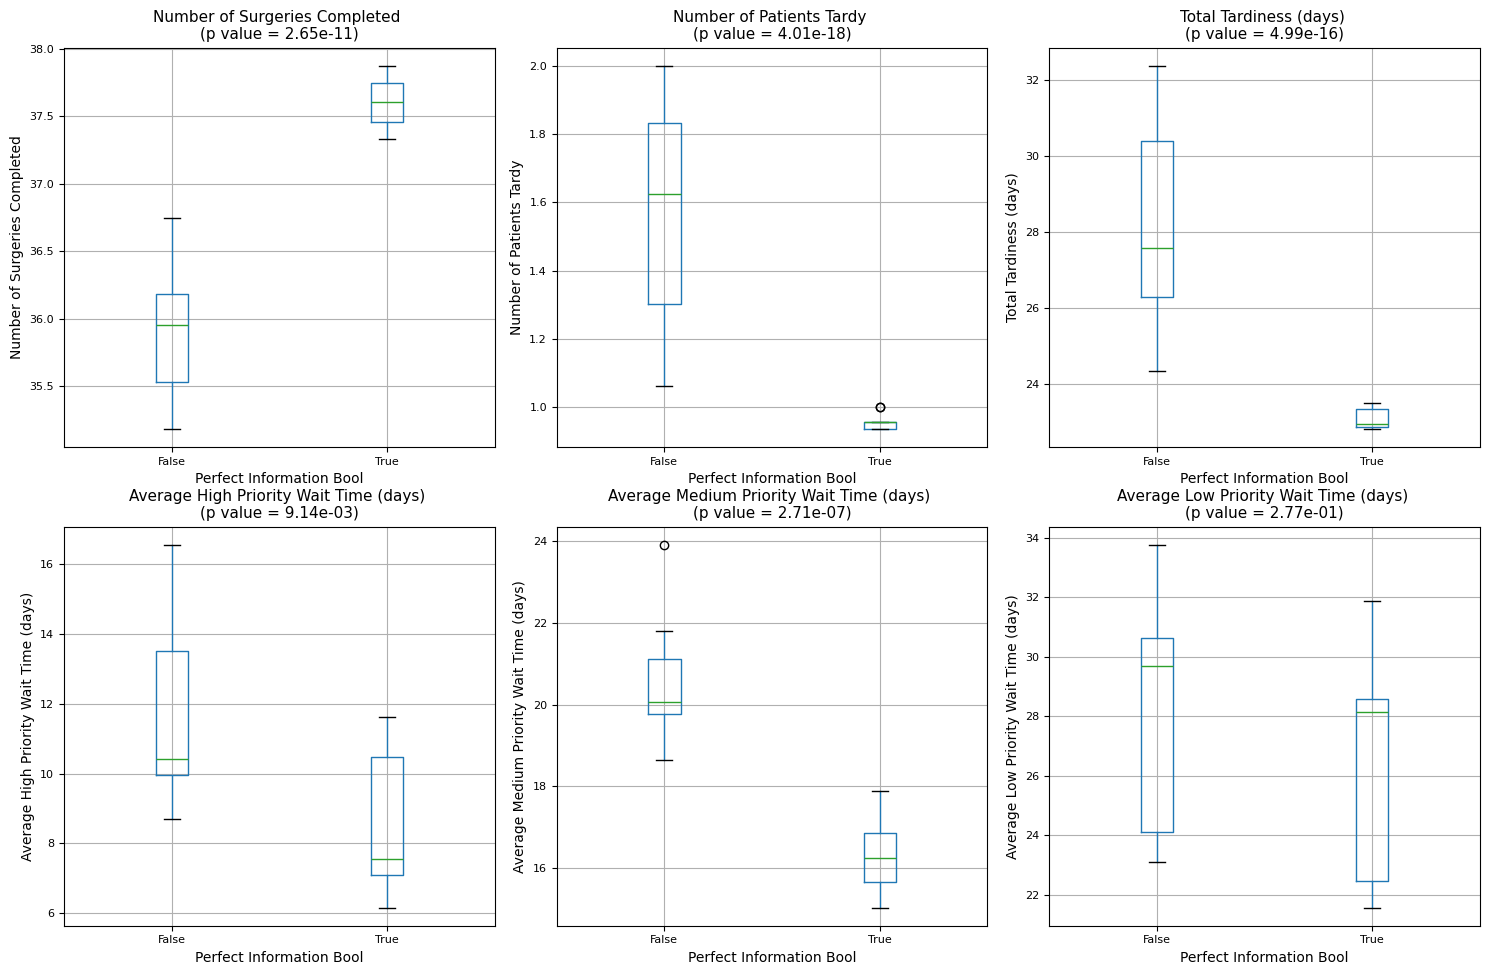

In [42]:
csv_path_5 = os.path.join(OUTPUT_DIR, "t&pmatrix_specialty_0_metrics_5_runs.csv")
csv_path_10 = os.path.join(OUTPUT_DIR, "t&pmatrix_specialty_0_metrics_10_runs.csv")

five_runs = pd.read_csv(csv_path_5)
ten_runs = pd.read_csv(csv_path_10)

five_runs['iteration'] = five_runs['iteration'] + 10

all_runs = pd.concat([ten_runs, five_runs])

all_runs = all_runs.drop(columns=['Unnamed: 0'])

avg_values = all_runs.groupby(['iteration', 'perfect_information_bool']).agg({
    'total tardiness': 'mean',
    'number of patients tardy': 'mean',
    'average wait time (priority < 0.33)': 'mean',
    'average wait_time (0.33 < priority < 0.66)': 'mean',
    'average wait time 0.66 < priority': 'mean',
    'number of surgeries scheduled': 'mean',
    'num sessions': 'mean',
    'num surgeries cancelled': 'mean',
    'cancelation proportion': 'mean'
}).reset_index()

# List of columns for box-and-whisker plots
columns_to_plot = [
    'number of surgeries scheduled',
    'number of patients tardy',
    'total tardiness',
    'average wait time 0.66 < priority',
    'average wait_time (0.33 < priority < 0.66)',
    'average wait time (priority < 0.33)'
]

title_mappings = {
    'number of surgeries scheduled': "Number of Surgeries Completed",
    'average wait time 0.66 < priority': "Average High Priority Wait Time (days)",
    'average wait_time (0.33 < priority < 0.66)': "Average Medium Priority Wait Time (days)",
    'average wait time (priority < 0.33)': "Average Low Priority Wait Time (days)",
    'number of patients tardy': "Number of Patients Tardy",
    'total tardiness': "Total Tardiness (days)"
}

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for i, column in enumerate(columns_to_plot, 0):
    #get p value
    p_val = p_vals[(p_vals['Metric'] == column) & (p_vals['perfect_information_bool'] == True)]['p-value'].iloc[0]
    formatted_p_val = "{:.2e}".format(p_val)

    avg_values.boxplot(column=column, by='perfect_information_bool', ax=axes[math.floor(i/3), i - 3*math.floor(i/3)])
    axes[math.floor(i/3), i - 3*math.floor(i/3)].set_title(f"{title_mappings[column]} \n(p value = {formatted_p_val})")
    axes[math.floor(i/3), i - 3*math.floor(i/3)].set_xlabel('Perfect Information Bool')
    axes[math.floor(i/3), i - 3*math.floor(i/3)].set_ylabel(title_mappings[column])

plt.suptitle('')  # Remove the default suptitle
plt.tight_layout()  # Adjust layout to prevent overlap
plt.subplots_adjust(hspace=0.2)  # Add more space between rows
plt.show()


                                        Metric  perfect_information_bool  \
0                number of surgeries scheduled                     False   
1                number of surgeries scheduled                      True   
2                     number of patients tardy                     False   
3                     number of patients tardy                      True   
4                              total tardiness                     False   
5                              total tardiness                      True   
6            average wait time 0.66 < priority                     False   
7            average wait time 0.66 < priority                      True   
8   average wait_time (0.33 < priority < 0.66)                     False   
9   average wait_time (0.33 < priority < 0.66)                      True   
10         average wait time (priority < 0.33)                     False   
11         average wait time (priority < 0.33)                      True   

    t-stati